In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import librosa
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import classification_report
from sklearn.utils import resample
import string
from nltk.stem import PorterStemmer

In [2]:
import tensorflow as tf

In [4]:
print(tf.__version__)

2.9.1


In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
data = load_breast_cancer()

In [7]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [14]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [15]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [20]:
data.data.shape

(569, 30)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size= 0.33, random_state= 42)

In [26]:
x_train.shape

(381, 30)

In [27]:
x_test.shape

(188, 30)

In [28]:
y_train.shape

(381,)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [32]:
model = Sequential()

In [33]:
model.add(Dense(1,activation='sigmoid'))

In [34]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 9ms/step - loss: 1.0483 - accuracy: 0.2467 - val_loss: 1.0647 - val_accuracy: 0.2819
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.9425 - accuracy: 0.3202 - val_loss: 0.9574 - val_accuracy: 0.3511
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 0.8459 - accuracy: 0.4016 - val_loss: 0.8625 - val_accuracy: 0.4309
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.7619 - accuracy: 0.4882 - val_loss: 0.7785 - val_accuracy: 0.5160
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.6037 - val_loss: 0.7054 - val_accuracy: 0.5904
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6269 - accuracy: 0.6772 - val_loss: 0.6449 - val_accuracy: 0.6755
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5759 - accuracy: 0.7297 - val_loss: 0.5911 - val_accuracy: 0.7606
Epoch 8/100
1

Epoch 59/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1425 - accuracy: 0.9685 - val_loss: 0.1310 - val_accuracy: 0.9840
Epoch 60/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1411 - accuracy: 0.9685 - val_loss: 0.1296 - val_accuracy: 0.9840
Epoch 61/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1398 - accuracy: 0.9685 - val_loss: 0.1283 - val_accuracy: 0.9840
Epoch 62/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1386 - accuracy: 0.9685 - val_loss: 0.1270 - val_accuracy: 0.9840
Epoch 63/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1373 - accuracy: 0.9711 - val_loss: 0.1257 - val_accuracy: 0.9840
Epoch 64/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1362 - accuracy: 0.9711 - val_loss: 0.1244 - val_accuracy: 0.9840
Epoch 65/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1350 - accuracy: 0.9711 - val_loss: 0.1232 - val_accuracy: 0.9840
Epoch 

In [37]:
loss=model.history.history

In [38]:
model.evaluate(x_train,y_train)

12/12 [==============================] - 0s 794us/step - loss: 0.1078 - accuracy: 0.9790


[0.10778211057186127, 0.9790025949478149]

In [39]:
model.evaluate(x_test,y_test)

6/6 [==============================] - 0s 995us/step - loss: 0.0953 - accuracy: 0.9894


[0.09529723227024078, 0.9893617033958435]

In [40]:
loss=pd.DataFrame(loss)

In [41]:
loss

,loss,accuracy,val_loss,val_accuracy
0,1.048309,0.246719,1.064705,0.281915
1,0.942508,0.320210,0.957404,0.351064
2,0.845909,0.401575,0.862490,0.430851
3,0.761949,0.488189,0.778530,0.515957
4,0.690785,0.603675,0.705401,0.590426
...,...,...,...,...
95,0.110289,0.979003,0.097527,0.989362
96,0.109712,0.979003,0.096939,0.989362
97,0.109170,0.979003,0.096390,0.989362
98,0.108629,0.979003,0.095819,0.989362


<Axes: >

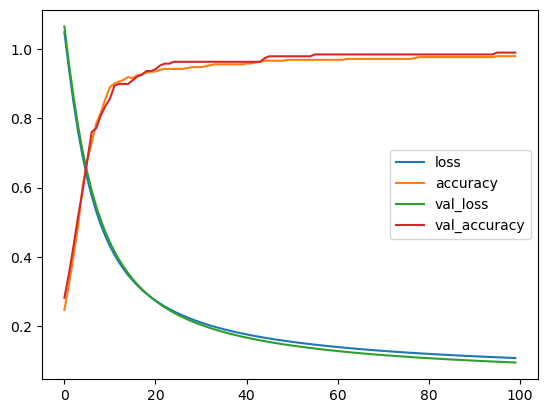

In [42]:
loss.plot()

In [43]:
predictions=model.predict(x_test)

6/6 [==============================] - 0s 621us/step


In [47]:
predictions= (predictions>0.5).astype(int)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.99      0.99      0.99       121

    accuracy                           0.99       188
   macro avg       0.99      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188



In [50]:
print (confusion_matrix(y_test, predictions))

[[ 66   1]
 [  1 120]]
